### Notebook to check study codelist for trimethoprim and nitrofurantoin data

A notebook to using [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) to compare codelists used by OpenPrescribing measure ["Antibiotic stewardship: prescribing of trimethoprim vs nitrofurantoin"](https://openprescribing.net/measure/trimethoprim/national/england/) against codelists being used in OpenSAFELY study.

- [Imports](#IMPORTS)
- [OpenPrescribing BNF codes](#OPBNF)
- [OpenPrescribing final data](#OPFULL)
- [Study BNF codes](#STUDYBNF)
- [Study final data](#STUDYFULL)
- [OpenPrescribing vs Study data table](#OPvsSTUDY)
- [OpenPrescribing vs Study plots](#CHARTS)

#### [TPP only data](#TPPSECTION)

- [Import EHR vendor data](#VENDORS)
- [TPP only OpenPrescribing BNF codes](#TPPOPBNF)
- [TPP only OpenPrescribing final data](#TPPOPFULL)
- [TPP only Study BNF codes](#TPPSTUDYBNF)
- [TPP only Study final data](#TPPSTUDYFULL)
- [Compare all vendors vs TPP vendors only](#CompareTable)
- [Compare all vendors vs TPP vendors only - charts](#CompareChart)

<a id='IMPORTS'></a>
### Imports
Import libraries required for analysis

In [1]:
#import libraries required for analysis
from ebmdatalab import bq
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#set to display all rows in data
pd.set_option('display.max_rows', None)

<a id='OPBNF'></a>
### OpenPrescribing BNF codes
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) results for BNF codes as used in OpenPrescribing ["Antibiotic stewardship: prescribing of trimethoprim vs nitrofurantoin"](https://openprescribing.net/measure/trimethoprim/definition/).


In [44]:
#OpenPrescribing BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0501080W0AAADAD", "0501080W0AAAEAE", "0501080W0AAAIAI", "0501080W0AAAMAM", "0501080W0AAANAN", "0501080W0BCACAI", "0501080W0BGABAE", "0501080W0BHAAAD", "0501080W0BHABAE")  THEN items ELSE 0 END) as OPtrimethoprim,
     SUM (CASE WHEN bnf_code IN ("0501130R0AAAAAA", "0501130R0AAABAB", "0501130R0AAACAC", "0501130R0AAADAD", "0501130R0AAAEAE", "0501130R0AAAGAG", "0501130R0AAAJAJ", "0501130R0AAAMAM", "0501130R0AAANAN", "0501130R0AAATAT", "0501130R0AAAUAU", "0501130R0AAAVAV", "0501130R0AABDBD", "0501130R0AABEBE", "0501130R0AABNBN", "0501130R0AABSBS", "0501130R0AACGCG", "0501130R0BBAAAD", "0501130R0BBABAE", "0501130R0BBACAC", "0501130R0BCAAAA", "0501130R0BCABAB", "0501130R0BGAAAG", "0501130R0BHAAAE", "0501130R0BHABAD")  THEN items ELSE 0 END) as OPnitrofurantoin
 FROM hscic.normalised_prescribing
 WHERE month >= '2019-01-01'
 GROUP BY month
 ORDER BY month'''

OP_DF = bq.cached_read(sql, csv_path=os.path.join('..','data','OPbnfcodes.csv'))
OP_DF

,month,OPtrimethoprim,OPnitrofurantoin
0,2019-01-01,152426,360236
1,2019-02-01,133176,314762
2,2019-03-01,141992,343045
3,2019-04-01,131158,322109
4,2019-05-01,138745,345123
5,2019-06-01,130105,333050
6,2019-07-01,134785,355237
7,2019-08-01,139567,373254
8,2019-09-01,135085,361110
9,2019-10-01,141477,381483


<a id='OPFULL'></a>
### OpenPrescribing data

Using dataframe from above, calculate:
1. total trimethoprim and nitrofurantoin data  
2. trimethoprim % of total of trimethoprim and nitrofurantoin.

In [63]:
#Create new column - Sum of trimethoprim and nitrofurantoin columns
OP_DF['OPtrim+OPnitro'] = OP_DF['OPtrimethoprim'] + OP_DF['OPnitrofurantoin']

#Create new column - Trimethoprim as a % of trimethoprim + nitrofurantoin
OP_DF['OPtrim_percent'] = OP_DF['OPtrimethoprim'] / OP_DF['OPtrim+OPnitro'] * 100

OP_DF

,month,OPtrimethoprim,OPnitrofurantoin,OPtrim+OPnitro,OPtrim_percent
0,2019-01-01,152426,360236,512662,29.732260
1,2019-02-01,133176,314762,447938,29.730900
2,2019-03-01,141992,343045,485037,29.274468
3,2019-04-01,131158,322109,453267,28.936146
4,2019-05-01,138745,345123,483868,28.674143
5,2019-06-01,130105,333050,463155,28.091028
6,2019-07-01,134785,355237,490022,27.505908
7,2019-08-01,139567,373254,512821,27.215539
8,2019-09-01,135085,361110,496195,27.224176
9,2019-10-01,141477,381483,522960,27.053121


<a id='STUDYBNF'></a>
### Study BNF codes
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) results for BNF codes as used in the study definition:
- [Trimethoprim codelist inc co-trimoxazole](https://www.opencodelists.org/codelist/user/yayang/codes_ab_type_trimethoprimcsv/1653d5a9/)
- [Nitrofurantoin codelist](https://www.opencodelists.org/codelist/user/yayang/codes_ab_type_nitrofurantoincsv/56b72f70/)

In [4]:
#Study BNF codes
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     SUM (CASE WHEN bnf_code IN ("0501080W0AAAPAP", "0501080W0AAAAAA", "0501080W0BHABAE", "0501080W0AAAEAE", "0501080W0BHAAAD", "0501080W0AAAIAI", "0501080W0BCAAAD", "0501080W0BCACAI", "0501080W0AAADAD", "0501080W0BCABAE", "0501080W0BGABAE", "0501080W0AAANAN", "0501080W0AAAMAM", "0501080W0AAAQAQ", "0501080W0BCADAA", "0501080W0BGAAAD") THEN items ELSE 0 END) as Studytrimethoprim,
     SUM (CASE WHEN bnf_code IN ("0501080D0AAABAB", "0501080D0BGACAJ", "0501080D0AAATAT", "0501080D0AAAHAH", "0501080D0BGAAAH", "0501080D0AAAJAJ", "0501080D0BGAHAB", "0501080D0BGAFAC", "0501080D0AAAEAE", "0501080D0AAACAC", "0501080D0BGAEAE")  THEN items ELSE 0 END) as Studycotrimoxazole,
     SUM (CASE WHEN bnf_code IN ("0501130R0BHAAAE", "0501130R0BBABAE", "0501130R0BGAAAG", "0501130R0AACGCG", "0501130R0AAATAT", "0501130R0AABJBJ", "0501130R0AABABA", "0501130R0AAAWAW", "0501130R0BHABAD", "0501130R0AAACAC", "0501130R0AABYBY", "0501130R0AAAUAU", "0501130R0AAAEAE", "0501130R0AABVBV", "0501130R0AABTBT", "0501130R0BCABAB", "0501130R0AAAZAZ", "0501130R0AABUBU", "0501130R0AAALAL", "0501130R0AABCBC", "0501130R0BBACAC", "0501130R0BDABAE", "0501130R0AAARAR", "0501130R0AABGBG", "0501130R0AAAPAP", "0501130R0AAAQAQ", "0501130R0AABWBW", "0501130R0AAAXAX", "0501130R0AACECE", "0501130R0AABSBS", "0501130R0AABDBD", "0501130R0AAADAD", "0501130R0AACJCJ", "0501130R0AABKBK", "0501130R0AABEBE", "0501130R0AAAMAM", "0501130R0AACDCD", "0501130R0AAAAAA", "0501130R0AABLBL", "0501130R0AABIBI", "0501130R0AABXBX", "0501130R0BCAAAA", "0501130R0AAASAS", "0501130R0AABNBN", "0501130R0BBAAAD", "0501130R0AAAVAV", "0501130R0AABRBR", "0501130R0AACICI", "0501130R0AABPBP", "0501130R0AAABAB", "0501130R0AAAGAG", "0501130R0BDAAAD", "0501130R0AAAJAJ", "0501130R0AABBBB", "0501130R0AAANAN", "0501130R0AABQBQ")  THEN items ELSE 0 END) as Studynitrofurantoin
 FROM hscic.normalised_prescribing
 WHERE month >= '2019-01-01'
 GROUP BY month
 ORDER BY month'''

STUDY_DF = bq.cached_read(sql, csv_path=os.path.join('..','data','STUDYbnfcodes.csv'))
STUDY_DF

,month,Studytrimethoprim,Studycotrimoxazole,Studynitrofurantoin
0,2019-01-01,152426,14570,360236
1,2019-02-01,133176,13259,314762
2,2019-03-01,141992,14131,343045
3,2019-04-01,131158,14140,322109
4,2019-05-01,138745,14989,345123
5,2019-06-01,130105,14163,333050
6,2019-07-01,134785,14697,355237
7,2019-08-01,139567,15519,373254
8,2019-09-01,135085,14648,361110
9,2019-10-01,141477,15795,381483


<a id='STUDYFULL'></a>
### Study data

Using dataframe from cell above, calculate:
1. sum trimethoprim + co-trimoxazole data
2. sum trimethoprim + nitrofurantoin data
3. sum trimethoprim + co-trimoxazole + nitrofurantoin data
4. trimethoprim % of total of trimethoprim and nitrofurantoin.
5. trimethoprim + co-trimoxazole % of total of trimethoprim, co-trimoxazole and nitrofurantoin.

In [18]:
#Sum all trimethoprim containing
STUDY_DF['StudyTrim+Cotrim'] = STUDY_DF['Studytrimethoprim'] + STUDY_DF['Studycotrimoxazole']

#Create new column - Sum of trimethoprim and nitrofurantoin columns
STUDY_DF['StudyTrim+Nitro'] = STUDY_DF['Studytrimethoprim'] + STUDY_DF['Studynitrofurantoin']

#Create new column - Sum trimethoprim, co-trimoxazole and nitrofurantoin columns
STUDY_DF['StudyTrim+Cotrim+Nitro'] = STUDY_DF['Studytrimethoprim'] + STUDY_DF['Studycotrimoxazole'] + STUDY_DF['Studynitrofurantoin']

#Create new column - Trimethoprim as a % of trimethoprim + nitrofurantoin
STUDY_DF['Studytrim_percent'] = STUDY_DF['Studytrimethoprim'] / STUDY_DF['StudyTrim+Nitro'] * 100

#Create new column - Trimethoprim + co-trimoxazole as a % of trimethoprim + co-trimoxazole + nitrofurantoin
STUDY_DF['Studytrim+cotrim_percent'] = STUDY_DF['StudyTrim+Cotrim'] / STUDY_DF['StudyTrim+Cotrim+Nitro'] * 100

STUDY_DF

,month,Studytrimethoprim,Studycotrimoxazole,Studynitrofurantoin,StudyTrim+Cotrim,StudyTrim+Nitro,StudyTrim+Cotrim+Nitro,Studytrim_percent,Studytrim+cotrim_percent
0,2019-01-01,152426,14570,360236,166996,512662,527232,29.732260,31.674102
1,2019-02-01,133176,13259,314762,146435,447938,461197,29.730900,31.751074
2,2019-03-01,141992,14131,343045,156123,485037,499168,29.274468,31.276644
3,2019-04-01,131158,14140,322109,145298,453267,467407,28.936146,31.085970
4,2019-05-01,138745,14989,345123,153734,483868,498857,28.674143,30.817248
5,2019-06-01,130105,14163,333050,144268,463155,477318,28.091028,30.224714
6,2019-07-01,134785,14697,355237,149482,490022,504719,27.505908,29.616876
7,2019-08-01,139567,15519,373254,155086,512821,528340,27.215539,29.353447
8,2019-09-01,135085,14648,361110,149733,496195,510843,27.224176,29.310962
9,2019-10-01,141477,15795,381483,157272,522960,538755,27.053121,29.191748


<a id='OPvsSTUDY'></a>
### OpenPrescribing vs Study

Side by side comparison of % for OpenPrescribing vs Study

In [65]:
#Get OpenPrescribing data for final comparison
FINAL_DF = OP_DF[['month', 'OPtrim_percent']]

#Merge in Study data
FINAL_DF = pd.merge(FINAL_DF, STUDY_DF[['month', 'Studytrim_percent', 'Studytrim+cotrim_percent']] ,on='month',how='left')

FINAL_DF

,month,OPtrim_percent,Studytrim_percent,Studytrim+cotrim_percent
0,2019-01-01,29.732260,29.732260,31.674102
1,2019-02-01,29.730900,29.730900,31.751074
2,2019-03-01,29.274468,29.274468,31.276644
3,2019-04-01,28.936146,28.936146,31.085970
4,2019-05-01,28.674143,28.674143,30.817248
5,2019-06-01,28.091028,28.091028,30.224714
6,2019-07-01,27.505908,27.505908,29.616876
7,2019-08-01,27.215539,27.215539,29.353447
8,2019-09-01,27.224176,27.224176,29.310962
9,2019-10-01,27.053121,27.053121,29.191748


<a id='CHARTS'></a>
### Chart comparison

Generate charts from data in above cell for comparison
1. OpenPrescribing codelists % of trimethoprim of total of trimethoprim + nitrofurantion
2. Study codelists % of trimethoprim of total of trimethoprim + nitrofurantion
3. Study codelists % of trimethoprim + co-trimoxazole of total of trimethoprim + co-trimoxazole + nitrofurantion

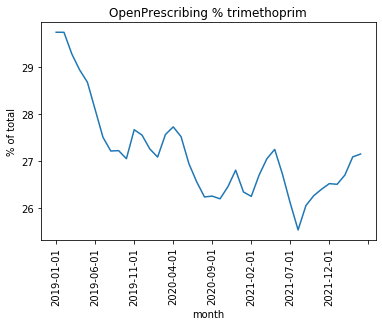

In [27]:
ax = FINAL_DF.groupby(["month"])['OPtrim_percent'].sum().plot(kind='line', title="OpenPrescribing % trimethoprim")
plt.xticks(rotation=90);
plt.ylabel('% of total');

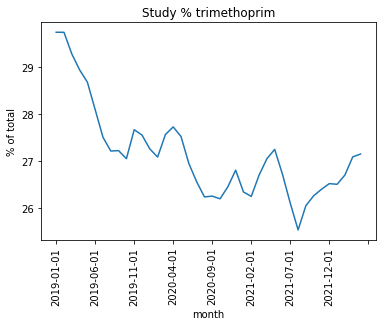

In [28]:
ax = FINAL_DF.groupby(["month"])['Studytrim_percent'].sum().plot(kind='line', title="Study % trimethoprim")
plt.xticks(rotation=90);
plt.ylabel('% of total');

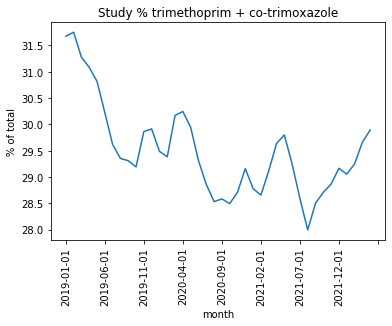

In [29]:
ax = FINAL_DF.groupby(["month"])['Studytrim+cotrim_percent'].sum().plot(kind='line', title="Study % trimethoprim + co-trimoxazole")
plt.xticks(rotation=90);
plt.ylabel('% of total');

----


<a id='TPPSECTION'></a>
## TPP only data

Re-run code filtering only to practices using TPP EHR.

<a id='TPPOPBNF'></a>
### TPP only OpenPrescribing BNF codes

Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) results for BNF codes as used in OpenPrescribing ["Antibiotic stewardship: prescribing of trimethoprim vs nitrofurantoin"](https://openprescribing.net/measure/trimethoprim/definition/). Limit results to TPP practices only, based on internal data held on EHR vendors.

In [94]:
#Import EPD based on OpenPrescribing codes. Link to vendors table to filter out only TPP practices.
#Vendors table subquery to select last EHR system on record - last record dates held = Aug 2019.
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     a.supplier,
     SUM (CASE WHEN bnf_code IN ("0501080W0AAADAD", "0501080W0AAAEAE", "0501080W0AAAIAI", "0501080W0AAAMAM", "0501080W0AAANAN", "0501080W0BCACAI", "0501080W0BGABAE", "0501080W0BHAAAD", "0501080W0BHABAE")  THEN items ELSE 0 END) as TPPOPtrimethoprim,
     SUM (CASE WHEN bnf_code IN ("0501130R0AAAAAA", "0501130R0AAABAB", "0501130R0AAACAC", "0501130R0AAADAD", "0501130R0AAAEAE", "0501130R0AAAGAG", "0501130R0AAAJAJ", "0501130R0AAAMAM", "0501130R0AAANAN", "0501130R0AAATAT", "0501130R0AAAUAU", "0501130R0AAAVAV", "0501130R0AABDBD", "0501130R0AABEBE", "0501130R0AABNBN", "0501130R0AABSBS", "0501130R0AACGCG", "0501130R0BBAAAD", "0501130R0BBABAE", "0501130R0BBACAC", "0501130R0BCAAAA", "0501130R0BCABAB", "0501130R0BGAAAG", "0501130R0BHAAAE", "0501130R0BHABAD")  THEN items ELSE 0 END) as TPPOPnitrofurantoin
 FROM hscic.normalised_prescribing AS normpresc
LEFT JOIN 
    (
        SELECT DISTINCT
          latestentry, UPPER(vendors.ODS) AS ODS, TRIM(Principal_Supplier) AS supplier 
        FROM `ebmdatalab.alex.vendors` as vendors
          INNER JOIN (
            SELECT UPPER(ODS) AS ODS, MAX(Date) AS latestentry FROM `ebmdatalab.alex.vendors` GROUP BY UPPER(ODS)
          ) le ON UPPER(vendors.ODS) = UPPER(le.ODS) AND Date = latestentry
    ) AS a
ON normpresc.Practice = a.ODS
 WHERE month >= '2019-01-01' AND a.supplier = 'TPP'
 GROUP BY month, a.supplier
 ORDER BY month
'''
OPVENDORS_DF = bq.cached_read(sql, csv_path=os.path.join('..','data','OPvendors.csv'))
OPVENDORS_DF

,month,supplier,TPPOPtrimethoprim,TPPOPnitrofurantoin
0,2019-01-01,TPP,60983,135375
1,2019-02-01,TPP,53494,117645
2,2019-03-01,TPP,56589,127521
3,2019-04-01,TPP,52226,119421
4,2019-05-01,TPP,55221,128474
5,2019-06-01,TPP,51787,124126
6,2019-07-01,TPP,53227,132872
7,2019-08-01,TPP,55552,139608
8,2019-09-01,TPP,53394,134893
9,2019-10-01,TPP,56375,143163


<a id='TPPOPFULL'></a>
### TPP only OpenPrescribing data

Using dataframe from above, calculate:
1. total trimethoprim and nitrofurantoin data  
2. trimethoprim % of total of trimethoprim and nitrofurantoin.

In [56]:
#Create new column - Sum of trimethoprim and nitrofurantoin columns
OPVENDORS_DF['TPPOPtrim+OPnitro'] = OPVENDORS_DF['TPPOPtrimethoprim'] + OPVENDORS_DF['TPPOPnitrofurantoin']

#Create new column - Trimethoprim as a % of trimethoprim + nitrofurantoin
OPVENDORS_DF['TPPOPtrim_percent'] = OPVENDORS_DF['TPPOPtrimethoprim'] / OPVENDORS_DF['TPPOPtrim+OPnitro'] * 100

OPVENDORS_DF

,month,supplier,TPPOPtrimethoprim,TPPOPnitrofurantoin,TPPOPtrim+OPnitro,TPPOPtrim_percent
0,2019-01-01,TPP,60983,135375,196358,31.057049
1,2019-02-01,TPP,53494,117645,171139,31.257633
2,2019-03-01,TPP,56589,127521,184110,30.736516
3,2019-04-01,TPP,52226,119421,171647,30.426398
4,2019-05-01,TPP,55221,128474,183695,30.061243
5,2019-06-01,TPP,51787,124126,175913,29.438984
6,2019-07-01,TPP,53227,132872,186099,28.601443
7,2019-08-01,TPP,55552,139608,195160,28.464849
8,2019-09-01,TPP,53394,134893,188287,28.357773
9,2019-10-01,TPP,56375,143163,199538,28.252764


<a id='TPPSTUDYBNF'></a>
### TPP only Study BNF codes
Get [English Prescribing Data](https://www.nhsbsa.nhs.uk/prescription-data/prescribing-data/english-prescribing-data-epd) results for BNF codes as used in the study definition:
- [Trimethoprim codelist inc co-trimoxazole](https://www.opencodelists.org/codelist/user/yayang/codes_ab_type_trimethoprimcsv/1653d5a9/)
- [Nitrofurantoin codelist](https://www.opencodelists.org/codelist/user/yayang/codes_ab_type_nitrofurantoincsv/56b72f70/)

Limit results to practices only with TPP EHR.

In [58]:
#Import EPD based on study codes. Link to vendors table to filter out only TPP practices.
#Vendors table subquery to select last EHR system on record - last record dates held = Aug 2019.
sql = '''
SELECT
     CAST(month AS DATE) AS month,
     a.supplier,
     SUM (CASE WHEN bnf_code IN ("0501080W0AAAPAP", "0501080W0AAAAAA", "0501080W0BHABAE", "0501080W0AAAEAE", "0501080W0BHAAAD", "0501080W0AAAIAI", "0501080W0BCAAAD", "0501080W0BCACAI", "0501080W0AAADAD", "0501080W0BCABAE", "0501080W0BGABAE", "0501080W0AAANAN", "0501080W0AAAMAM", "0501080W0AAAQAQ", "0501080W0BCADAA", "0501080W0BGAAAD") THEN items ELSE 0 END) as TPPStudytrimethoprim,
     SUM (CASE WHEN bnf_code IN ("0501080D0AAABAB", "0501080D0BGACAJ", "0501080D0AAATAT", "0501080D0AAAHAH", "0501080D0BGAAAH", "0501080D0AAAJAJ", "0501080D0BGAHAB", "0501080D0BGAFAC", "0501080D0AAAEAE", "0501080D0AAACAC", "0501080D0BGAEAE")  THEN items ELSE 0 END) as TPPStudycotrimoxazole,
     SUM (CASE WHEN bnf_code IN ("0501130R0BHAAAE", "0501130R0BBABAE", "0501130R0BGAAAG", "0501130R0AACGCG", "0501130R0AAATAT", "0501130R0AABJBJ", "0501130R0AABABA", "0501130R0AAAWAW", "0501130R0BHABAD", "0501130R0AAACAC", "0501130R0AABYBY", "0501130R0AAAUAU", "0501130R0AAAEAE", "0501130R0AABVBV", "0501130R0AABTBT", "0501130R0BCABAB", "0501130R0AAAZAZ", "0501130R0AABUBU", "0501130R0AAALAL", "0501130R0AABCBC", "0501130R0BBACAC", "0501130R0BDABAE", "0501130R0AAARAR", "0501130R0AABGBG", "0501130R0AAAPAP", "0501130R0AAAQAQ", "0501130R0AABWBW", "0501130R0AAAXAX", "0501130R0AACECE", "0501130R0AABSBS", "0501130R0AABDBD", "0501130R0AAADAD", "0501130R0AACJCJ", "0501130R0AABKBK", "0501130R0AABEBE", "0501130R0AAAMAM", "0501130R0AACDCD", "0501130R0AAAAAA", "0501130R0AABLBL", "0501130R0AABIBI", "0501130R0AABXBX", "0501130R0BCAAAA", "0501130R0AAASAS", "0501130R0AABNBN", "0501130R0BBAAAD", "0501130R0AAAVAV", "0501130R0AABRBR", "0501130R0AACICI", "0501130R0AABPBP", "0501130R0AAABAB", "0501130R0AAAGAG", "0501130R0BDAAAD", "0501130R0AAAJAJ", "0501130R0AABBBB", "0501130R0AAANAN", "0501130R0AABQBQ")  THEN items ELSE 0 END) as TPPStudynitrofurantoin
 FROM hscic.normalised_prescribing AS normpresc
LEFT JOIN 
    (
        SELECT DISTINCT
          latestentry, UPPER(vendors.ODS) AS ODS, TRIM(Principal_Supplier) AS supplier 
        FROM `ebmdatalab.alex.vendors` as vendors
          INNER JOIN (
            SELECT UPPER(ODS) AS ODS, MAX(Date) AS latestentry FROM `ebmdatalab.alex.vendors` GROUP BY UPPER(ODS)
          ) le ON UPPER(vendors.ODS) = UPPER(le.ODS) AND Date = latestentry
    ) AS a
ON normpresc.Practice = a.ODS
 WHERE month >= '2019-01-01' AND a.supplier = 'TPP'
 GROUP BY month, a.supplier
 ORDER BY month
'''
STUDYVENDORS_DF = bq.cached_read(sql, csv_path=os.path.join('..','data','Studyvendors.csv'))
STUDYVENDORS_DF

,month,supplier,TPPStudytrimethoprim,TPPStudycotrimoxazole,TPPStudynitrofurantoin
0,2019-01-01,TPP,60983,5789,135375
1,2019-02-01,TPP,53494,5247,117645
2,2019-03-01,TPP,56589,5568,127521
3,2019-04-01,TPP,52226,5423,119421
4,2019-05-01,TPP,55221,5785,128474
5,2019-06-01,TPP,51787,5519,124126
6,2019-07-01,TPP,53227,5715,132872
7,2019-08-01,TPP,55552,6164,139608
8,2019-09-01,TPP,53394,5777,134893
9,2019-10-01,TPP,56375,6299,143163


<a id='TPPSTUDYFULL'></a>
### TPP only Study data

Using dataframe from cell above, calculate:
1. sum trimethoprim + co-trimoxazole data
2. sum trimethoprim + nitrofurantoin data
3. sum trimethoprim + co-trimoxazole + nitrofurantoin data
4. trimethoprim % of total of trimethoprim and nitrofurantoin.
5. trimethoprim + co-trimoxazole % of total of trimethoprim, co-trimoxazole and nitrofurantoin.

In [59]:
#Sum all trimethoprim containing
STUDYVENDORS_DF['TPPStudyTrim+Cotrim'] = STUDYVENDORS_DF['TPPStudytrimethoprim'] + STUDYVENDORS_DF['TPPStudycotrimoxazole']

#Create new column - Sum of trimethoprim and nitrofurantoin columns
STUDYVENDORS_DF['TPPStudyTrim+Nitro'] = STUDYVENDORS_DF['TPPStudytrimethoprim'] + STUDYVENDORS_DF['TPPStudynitrofurantoin']

#Create new column - Sum trimethoprim, co-trimoxazole and nitrofurantoin columns
STUDYVENDORS_DF['TPPStudyTrim+Cotrim+Nitro'] = STUDYVENDORS_DF['TPPStudytrimethoprim'] + STUDYVENDORS_DF['TPPStudycotrimoxazole'] + STUDYVENDORS_DF['TPPStudynitrofurantoin']

#Create new column - Trimethoprim as a % of trimethoprim + nitrofurantoin
STUDYVENDORS_DF['TPPStudytrim_percent'] = STUDYVENDORS_DF['TPPStudytrimethoprim'] / STUDYVENDORS_DF['TPPStudyTrim+Nitro'] * 100

#Create new column - Trimethoprim + co-trimoxazole as a % of trimethoprim + co-trimoxazole + nitrofurantoin
STUDYVENDORS_DF['TPPStudytrim+cotrim_percent'] = STUDYVENDORS_DF['TPPStudyTrim+Cotrim'] / STUDYVENDORS_DF['TPPStudyTrim+Cotrim+Nitro'] * 100

STUDYVENDORS_DF

,month,supplier,TPPStudytrimethoprim,TPPStudycotrimoxazole,TPPStudynitrofurantoin,TPPStudyTrim+Cotrim,TPPStudyTrim+Nitro,TPPStudyTrim+Cotrim+Nitro,TPPStudytrim_percent,TPPStudytrim+cotrim_percent
0,2019-01-01,TPP,60983,5789,135375,66772,196358,202147,31.057049,33.031408
1,2019-02-01,TPP,53494,5247,117645,58741,171139,176386,31.257633,33.302530
2,2019-03-01,TPP,56589,5568,127521,62157,184110,189678,30.736516,32.769747
3,2019-04-01,TPP,52226,5423,119421,57649,171647,177070,30.426398,32.557181
4,2019-05-01,TPP,55221,5785,128474,61006,183695,189480,30.061243,32.196538
5,2019-06-01,TPP,51787,5519,124126,57306,175913,181432,29.438984,31.585387
6,2019-07-01,TPP,53227,5715,132872,58942,186099,191814,28.601443,30.728727
7,2019-08-01,TPP,55552,6164,139608,61716,195160,201324,28.464849,30.655063
8,2019-09-01,TPP,53394,5777,134893,59171,188287,194064,28.357773,30.490457
9,2019-10-01,TPP,56375,6299,143163,62674,199538,205837,28.252764,30.448364


<a id='TPPOPvsSTUDY'></a>
### TPP only OpenPrescribing vs Study data table

Side by side comparison of % for OpenPrescribing vs Study

In [61]:
#Get OpenPrescribing data for final comparison
TPPFINAL_DF = OPVENDORS_DF[['month', 'TPPOPtrim_percent']]

#Merge in Study data
TPPFINAL_DF = pd.merge(TPPFINAL_DF, STUDYVENDORS_DF[['month', 'TPPStudytrim_percent', 'TPPStudytrim+cotrim_percent']] ,on='month',how='left')

TPPFINAL_DF

,month,TPPOPtrim_percent,TPPStudytrim_percent,TPPStudytrim+cotrim_percent
0,2019-01-01,31.057049,31.057049,33.031408
1,2019-02-01,31.257633,31.257633,33.302530
2,2019-03-01,30.736516,30.736516,32.769747
3,2019-04-01,30.426398,30.426398,32.557181
4,2019-05-01,30.061243,30.061243,32.196538
5,2019-06-01,29.438984,29.438984,31.585387
6,2019-07-01,28.601443,28.601443,30.728727
7,2019-08-01,28.464849,28.464849,30.655063
8,2019-09-01,28.357773,28.357773,30.490457
9,2019-10-01,28.252764,28.252764,30.448364


<a id='CompareTable'></a>
### Compare all vendors vs TPP vendors only

Side by side comparison of % for all EHR vs TPP only

In [99]:
#Get OpenPrescribing data for final comparison
COMPAREVENDORS_DF = STUDY_DF[['month', 'Studytrim_percent', 'Studytrim+cotrim_percent']]


#Merge in Study data
COMPAREVENDORS_DF = pd.merge(COMPAREVENDORS_DF, STUDYVENDORS_DF[['month', 'TPPStudytrim_percent', 'TPPStudytrim+cotrim_percent']] ,on='month',how='left')

#Re-order columns
COMPAREVENDORS_DF = COMPAREVENDORS_DF[['month', 'Studytrim_percent', 'TPPStudytrim_percent','Studytrim+cotrim_percent', 'TPPStudytrim+cotrim_percent']]
COMPAREVENDORS_DF = COMPAREVENDORS_DF.rename(columns={"Studytrim_percent": "All vendor trim %", "TPPStudytrim_percent": "TPP only trim %", "Studytrim+cotrim_percent": "All vendor trim+cotrim %", "TPPStudytrim+cotrim_percent": "TPP only trim+cotrim %"})
COMPAREVENDORS_DF

,month,All vendor trim %,TPP only trim %,All vendor trim+cotrim %,TPP only trim+cotrim %
0,2019-01-01,29.732260,31.057049,31.674102,33.031408
1,2019-02-01,29.730900,31.257633,31.751074,33.302530
2,2019-03-01,29.274468,30.736516,31.276644,32.769747
3,2019-04-01,28.936146,30.426398,31.085970,32.557181
4,2019-05-01,28.674143,30.061243,30.817248,32.196538
5,2019-06-01,28.091028,29.438984,30.224714,31.585387
6,2019-07-01,27.505908,28.601443,29.616876,30.728727
7,2019-08-01,27.215539,28.464849,29.353447,30.655063
8,2019-09-01,27.224176,28.357773,29.310962,30.490457
9,2019-10-01,27.053121,28.252764,29.191748,30.448364


<a id='CompareChart'></a>
### Compare all vendors vs TPP vendors only - plots

Plots for comparison of % for all EHR vs TPP only

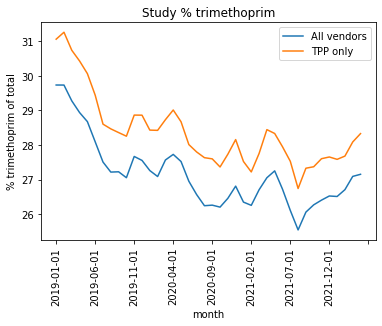

In [100]:
COMPAREVENDORS_DF[['month','All vendor trim %', 'TPP only trim %']].plot(x='month')
plt.legend(["All vendors", "TPP only"]);
plt.title("Study % trimethoprim");
plt.xticks(rotation=90);
plt.ylabel('% trimethoprim of total');

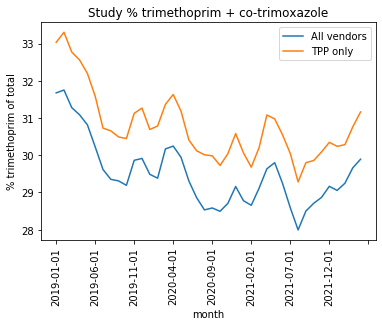

In [101]:
COMPAREVENDORS_DF[['month','All vendor trim+cotrim %', 'TPP only trim+cotrim %']].plot(x='month')
plt.legend(["All vendors", "TPP only"]);
plt.title("Study % trimethoprim + co-trimoxazole");
plt.xticks(rotation=90);
plt.ylabel('% trimethoprim of total');